<a href="https://colab.research.google.com/github/larrymoralez/ML-HW-3/blob/master/ML_HW_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import zipfile
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-19 01:12:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   137MB/s    in 0.5s    

2019-04-19 01:12:59 (137 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir = '/tmp/cats_and_dogs_filtered'

train_data = os.path.join(dir, 'train')
val_data = os.path.join(dir, 'validation')

train_cats = os.path.join(train_data, 'cats')
train_dogs = os.path.join(train_data, 'dogs')
val_cats = os.path.join(val_data, 'cats')
val_dogs = os.path.join(val_data, 'dogs')

In [0]:
conv_base = VGG19(weights = 'imagenet',
              include_top=False, 
              input_shape=(150, 150, 3))

#model.summary()

model.trainable = False

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# no dropout
model.add(layers.Dense(1, activation='sigmoid'))

#model.summary()

In [31]:
train_data_gen = ImageDataGenerator(
  featurewise_center = False,
  samplewise_center = False,
  featurewise_std_normalization = False,
  samplewise_std_normalization = False,
  rotation_range = 90,
  horizontal_flip = True,
  vertical_flip = True)

train_gen = train_data_gen.flow_from_directory(train_data, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

val_data_gen = ImageDataGenerator(rescale=1./255)

val_gen = val_data_gen.flow_from_directory(val_data, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(
    train_gen,
    steps_per_epoch=5,
    epochs=5,
    validation_data=val_gen,
    validation_steps=50
)

Epoch 1/5
5/5 [==============================] - 401s 80s/step - loss: 7.6906 - acc: 0.4900 - val_loss: 0.9461 - val_acc: 0.4800
Epoch 2/5
5/5 [==============================] - 397s 79s/step - loss: 9.0409 - acc: 0.4300 - val_loss: 1.3335 - val_acc: 0.5000
Epoch 3/5
5/5 [==============================] - 399s 80s/step - loss: 7.8979 - acc: 0.5100 - val_loss: 1.3655 - val_acc: 0.4920
Epoch 4/5
5/5 [==============================] - 398s 80s/step - loss: 7.5755 - acc: 0.5300 - val_loss: 1.3046 - val_acc: 0.5110
Epoch 5/5
5/5 [==============================] - 402s 80s/step - loss: 7.5755 - acc: 0.5300 - val_loss: 1.3688 - val_acc: 0.4820


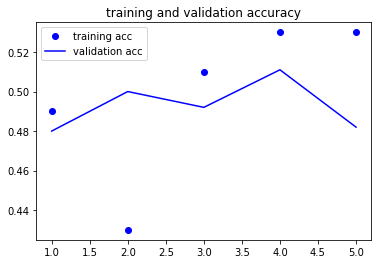

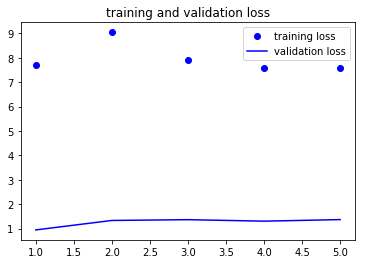

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()